In [69]:
import pandas as pd
import seaborn as sns

# Yelp reviews

In [70]:
yelp_df = pd.read_csv('yelp_labelled.txt', delimiter='\n')

In [71]:
yelp_df['sentiment'] = yelp_df['review'].str[-1]
yelp_df['sentiment'] = pd.to_numeric(yelp_df['sentiment'])
yelp_df['review'] = yelp_df['review'].str[:-3]

In [72]:
yelp_df.head()

,review,sentiment
0,Wow... Loved this place,1
1,Crust is not good,0
2,Not tasty and the texture was just nasty,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [73]:
keywords = {}
for review in yelp_df['review']:
    for words in review.split():
        try: 
            keywords[words.lower()] += 1
        except:
            keywords[words.lower()] = 1


In [74]:
# I created an for loop to detect the most used words in the yelp reviews

sorted_keywords = {}
sorted_values = sorted(keywords.values(), reverse=True)
i = 0
for i in range(len(sorted_values)):
    for key in keywords:
        if keywords[key] == sorted_values[i]:
            sorted_keywords[key] = sorted_values[i]
print(sorted_keywords)

{'the': 582, 'and': 388, 'i': 303, 'was': 295, 'a': 237, 'to': 217, 'is': 171, 'this': 143, 'it': 130, 'of': 126, 'not': 115, 'food': 111, 'for': 110, 'in': 107, 'place': 100, 'good': 87, 'we': 79, 'service': 74, 'very': 74, 'my': 72, 'with': 71, 'had': 70, 'that': 67, 'so': 66, 'be': 66, 'great': 64, 'were': 62, 'are': 62, 'have': 62, 'but': 61, 'you': 57, 'back': 57, 'they': 56, 'at': 55, 'on': 54, 'here': 53, 'like': 45, 'go': 42, 'our': 41, 'time': 40, 'all': 37, 'will': 37, 'as': 36, 'just': 34, 'there': 34, 'really': 33, 'an': 32, 'their': 31, 'if': 30, 'best': 29, 'would': 28, 'ever': 27, 'only': 26, 'one': 26, 'your': 25, 'never': 25, "don't": 25, 'up': 24, 'no': 24, 'also': 24, 'restaurant': 24, 'out': 24, 'been': 23, 'what': 23, 'friendly': 23, 'from': 23, 'did': 22, 'again': 22, 'by': 21, '-': 21, 'nice': 21, 'which': 20, 'some': 20, 'came': 20, 'when': 20, 'delicious': 20, "i've": 20, "i'm": 20, 'pretty': 19, 'vegas': 19, 'staff': 19, 'get': 19, 'us': 19, 'love': 19, 'or': 

In [75]:
# Out of the most used words, I chose words that would indicate sentiment

sentiment_keywords = ['not', 'back', 'service', 'very', 'go', 'no', "don't", 'good', 'would', 'never', 'time', 'ever', 'minutes', "won't", 'bad', 'much', 'again', 'worst', 'disappointed', 'really', 'slow', 'waited', 'wait', 'bland', 'flavor', 'experience', 'best', 'terrible', 'definitely', 'rude', 'cold', 'taste', 'overpriced', 'poor', 'mediocre', 'management', 'off', 'impressed', 'money', 'horrible', 'sick', 'waiter', 'tasted', 'nasty', 'great', 'angry', 'honestly', 'would not', 'care', 'disgusted', 'recommended', 'not worth', 'amazing', 'liked', 'not like', 'hour', 'dirty', 'unfortunately', 'worse', 'friendly', 'love', 'loved', 'excellent', 'absolutely', 'recommend', 'was']

In [76]:
for word in sentiment_keywords:
    yelp_df[word] = yelp_df['review'].str.contains(" " + word + " ", case=False)

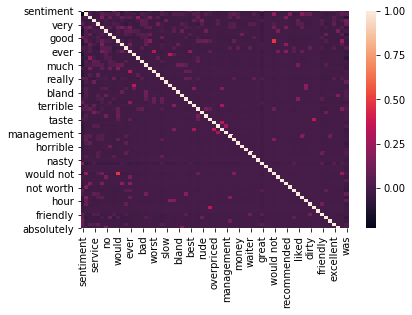

In [77]:
sns.heatmap(yelp_df.corr())

In [78]:
data = yelp_df[sentiment_keywords]
target = yelp_df['sentiment']

In [79]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print('This model incorrectly classified {} yelp reviews out of {}'.format((target != y_pred).sum(), len(data)))

This model incorrectly classified 289 yelp reviews out of 1000


# IMDB reviews

In [80]:
imdb_df = pd.read_csv('imdb_labelled.txt', delimiter='\n')
imdb_df['sentiment'] = imdb_df['review'].str[-1]
imdb_df['sentiment'] = pd.to_numeric(imdb_df['sentiment'])
imdb_df['review'] = imdb_df['review'].str[:-4]
imdb_df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [81]:
for word in sentiment_keywords:
    imdb_df[word] = imdb_df['review'].str.contains(" " + word + " ", case=False)

In [82]:
data = imdb_df[sentiment_keywords]
target = imdb_df['sentiment']

In [83]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print('This model incorrectly classified {} IMDB reviews out of {}'.format((target != y_pred).sum(), len(data)))

This model incorrectly classified 266 IMDB reviews out of 748


# Amazon reviews

In [84]:
amazon_df = pd.read_csv('amazon_cells_labelled.txt', delimiter='\n')
amazon_df['sentiment'] = amazon_df['review'].str[-1]
amazon_df['sentiment'] = pd.to_numeric(amazon_df['sentiment'])
amazon_df['review'] = amazon_df['review'].str[:-2]
amazon_df.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [85]:
for word in sentiment_keywords:
    amazon_df[word] = amazon_df['review'].str.contains(" " + word + " ", case=False)

In [86]:
data = amazon_df[sentiment_keywords]
target = amazon_df['sentiment']

In [87]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print('This model incorrectly classified {} amazon reviews out of {}'.format((target != y_pred).sum(), len(data)))

This model incorrectly classified 358 amazon reviews out of 1000


# Featured engineering selection

First I looked up the most used words in the yelp reviews. I then selected many of the 'sentimental' keywords from this most used words list. Then I created a new column for each keyword. In each column is a boolean for whether or not that word is in the review.